<a href="https://colab.research.google.com/github/RonakMehta21/FastAI-Keras-Colabs/blob/master/Keras_CIPHAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Object Detection using Keras

This Colab Notebook uses [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset collected by by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton which consists of 50000 training images and 10000 test images. This dataset has 60000 32x32 colour images in 10 classes, with 6000 images per class. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another.

This notebook uses [tf.keras](www.tensorflow.org/guide/keras), a high-level API to build and train models in TensorFlow.

In [0]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [83]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.1.0


Import the CIFAR-10 Dataset.

In [0]:
ciphar = keras.datasets.cifar10

Loading the dataset returns four NumPy arrays:
##### 1. `train_images` and `train_labels` which would be used to train the model.
##### 2. `test_images` and `test_labels` to test the model.

The images are 32x32 NumPy arrays, with pixel values ranging from 0 to 255. The labels are an array of integers, ranging from 0 to 9. These correspond to the class of objects the image represents.

In [0]:
(train_images, train_labels), (test_images, test_labels) = ciphar.load_data()

### Explore the dataset

In [70]:
train_images.shape

(50000, 32, 32, 3)

The training dataset contains 50000 images each represented as 32x32 pixels. 

In [71]:
len(train_labels)

50000

In [114]:
print(train_labels[0][0])

6


In [73]:
test_images.shape

(10000, 32, 32, 3)

The Test data contains 10000 images.

In [74]:
len(test_labels)

10000

###Preprocess the dataset

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

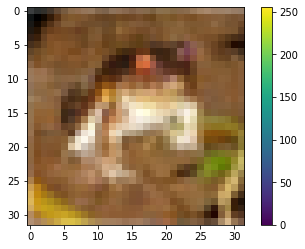

In [75]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the training set and the testing set be preprocessed in the same way:

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [0]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the training set and display the class name below each image.

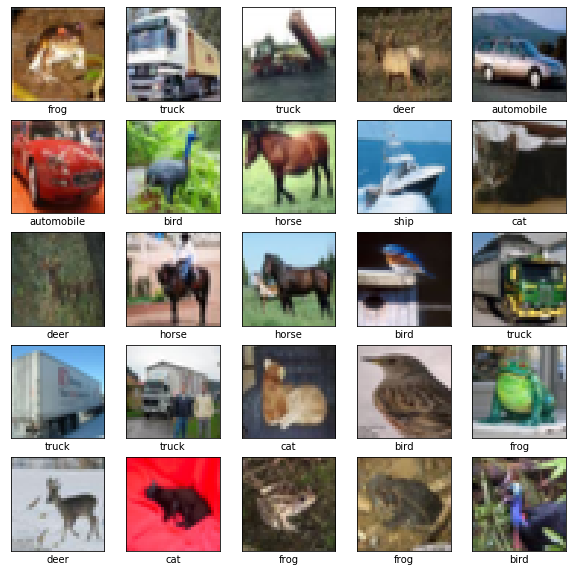

In [78]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### Build the model

Building the neural network requires configuring the layers of the model, then compiling the model.

### Setup the layers
The basic building block of a neural network is the layer. Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as tf.keras.layers.Dense, have parameters that are learned during training.

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

### Compile the Model:

Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

1. Loss function — This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
2. Optimizer — This is how the model is updated based on the data it sees and its loss function.
3. Metrics — Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set—in this example, the `test_images` array.
4. Verify that the predictions match the labels from the `test_labels` array.

### Feed the model

To start training,  call the `model.fit` method—so called because it "fits" the model to the training data:

In [89]:
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 72s 1ms/sample - loss: 1.5381 - accuracy: 0.4402 - val_loss: 1.2110 - val_accuracy: 0.5732
Epoch 2/10
50000/50000 [==============================] - 72s 1ms/sample - loss: 1.1344 - accuracy: 0.6017 - val_loss: 1.0380 - val_accuracy: 0.6382
Epoch 3/10
50000/50000 [==============================] - 71s 1ms/sample - loss: 0.9752 - accuracy: 0.6563 - val_loss: 0.9595 - val_accuracy: 0.6668
Epoch 4/10
50000/50000 [==============================] - 71s 1ms/sample - loss: 0.8743 - accuracy: 0.6950 - val_loss: 0.9074 - val_accuracy: 0.6837
Epoch 5/10
50000/50000 [==============================] - 71s 1ms/sample - loss: 0.8070 - accuracy: 0.7156 - val_loss: 0.8786 - val_accuracy: 0.6944
Epoch 6/10
50000/50000 [==============================] - 71s 1ms/sample - loss: 0.7507 - accuracy: 0.7367 - val_loss: 0.8606 - val_accuracy: 0.7020
Epoch 7/10
50000/50000 [==============================] 

As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.71 (or 71%) on the training data.

### Evaluate the accuracy

Next, compare how the model performs on the test dataset:

10000/10000 - 4s - loss: 0.8796 - accuracy: 0.7102


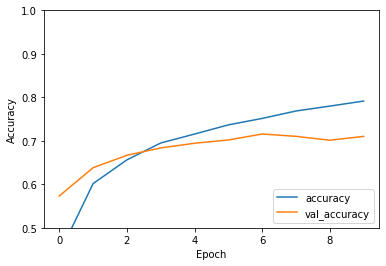

In [90]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [91]:
print(test_acc)

0.7102


In [0]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [0]:
predictions = probability_model.predict(test_images)

Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [95]:
predictions[0]

array([6.9721602e-04, 6.8170346e-05, 1.0852927e-03, 9.6618974e-01,
       1.0291403e-03, 8.6977063e-03, 1.6268145e-02, 9.4474126e-06,
       3.9925138e-03, 1.9626012e-03], dtype=float32)

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:

In [96]:
np.argmax(predictions[0])

3

In [99]:
print(test_labels[0][0])

3


Graph this to look at the full set of 10 class predictions.

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label[0]]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label[0]].set_color('blue')

### Verify predictions

With the model trained, you can use it to make predictions about some images.

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

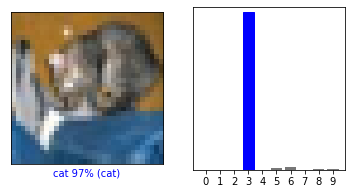

In [105]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

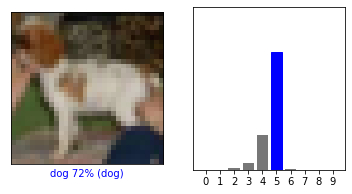

In [106]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Let's plot several images with their predictions. Note that the model can be wrong even when very confident.

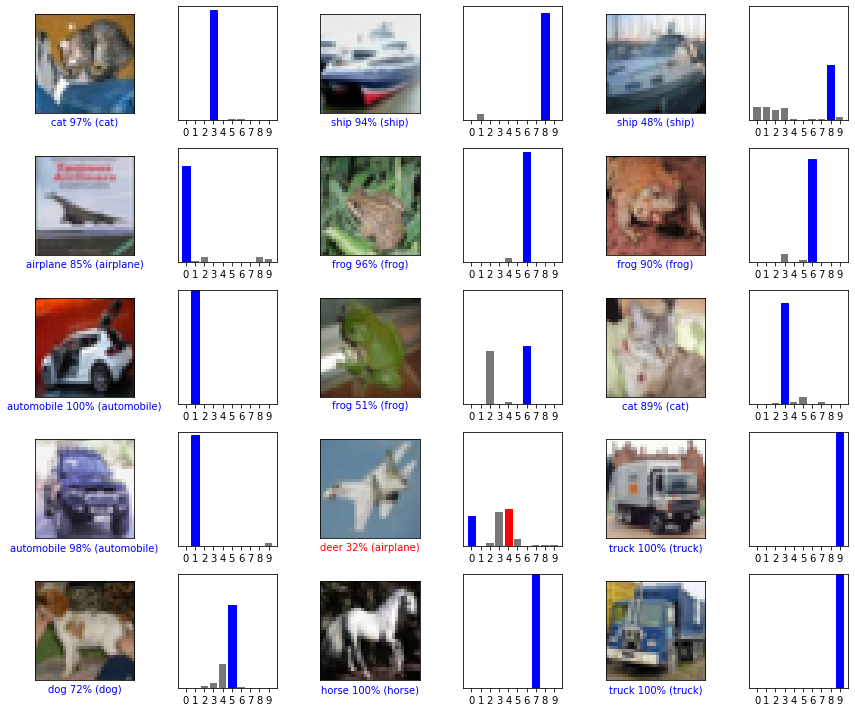

In [107]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Use the trained model

Finally, use the trained model to make a prediction about a single image.

In [108]:
img = test_images[1]

print(img.shape)

(32, 32, 3)


In [109]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 32, 32, 3)


In [110]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[1.8193047e-03 5.5234723e-02 9.3988419e-08 1.3920414e-05 7.3771478e-09
  1.2443009e-08 8.0681353e-08 2.5080078e-07 9.4256246e-01 3.6911873e-04]]


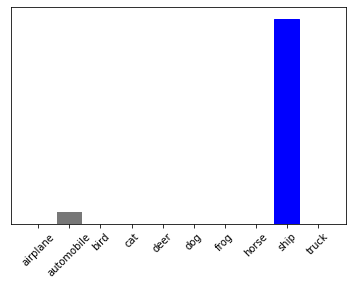

In [111]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [112]:
np.argmax(predictions_single[0])

8

And the model predicts a label as expected.